# Star Wars Fan Analysis

Data taken from fivethrityeight under Creative Commons Attribution 4.0 International license
https://github.com/fivethirtyeight/data

In [1]:
import pandas as pd
import numpy as np

#star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars = pd.read_csv("~\OneDrive\Documents\data\star-wars-survey\StarWars.csv", encoding="ISO-8859-1")
#print (star_wars.head(10))
#print (star_wars.columns)
star_wars.shape

(1187, 38)

In [2]:
#remove all traces of the latin language
star_wars.rename(columns={'Do you consider yourself to be a fan of the Expanded Universe?æ':'Do you consider yourself to be a fan of the Expanded Universe?'},inplace=True)

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()].reset_index(drop=True)

In [4]:
star_wars.shape

(1186, 38)

In [5]:
#observations
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacif

In [6]:
#map yes/no responses to booleans
yes_to_bool = {'Yes': True,
              'No': False}

columns_to_bool = ['Have you seen any of the 6 films in the Star Wars franchise?',
                  'Do you consider yourself to be a fan of the Star Wars film franchise?',
                  'Are you familiar with the Expanded Universe?',
                  'Do you consider yourself to be a fan of the Expanded Universe?',
                  'Do you consider yourself to be a fan of the Star Trek franchise?']

for col in columns_to_bool:
    star_wars[col] = star_wars[col].map(yes_to_bool)
    print (star_wars[col].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
False    615
NaN      358
True     213
Name: Are you familiar with the Expanded Universe?, dtype: int64
NaN      973
False    114
True      99
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64
False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


# Convert Checkbox Responses to Boolean Values & Make Columns Readable

In [7]:
seen_movie = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

readable_titles = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'watched_ep1',
    'Unnamed: 4': 'watched_ep2',
    'Unnamed: 5': 'watched_ep3',
    'Unnamed: 6': 'watched_ep4',
    'Unnamed: 7': 'watched_ep5',
    'Unnamed: 8': 'watched_ep6', 
}
star_wars.rename(mapper=readable_titles, axis=1, inplace=True)

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen_movie)
    print (star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: watched_ep1, dtype: int64
False    615
True     571
Name: watched_ep2, dtype: int64
False    636
True     550
Name: watched_ep3, dtype: int64
True     607
False    579
Name: watched_ep4, dtype: int64
True     758
False    428
Name: watched_ep5, dtype: int64
True     738
False    448
Name: watched_ep6, dtype: int64


# Cleaning Up Star Wars Movie Rankings

In [8]:
readable_rankings = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_ep1',
    'Unnamed: 10': 'rank_ep2',
    'Unnamed: 11': 'rank_ep3',
    'Unnamed: 12': 'rank_ep4',
    'Unnamed: 13': 'rank_ep5',
    'Unnamed: 14': 'rank_ep6', 
}
star_wars.rename(mapper=readable_rankings, axis=1, inplace=True)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars[star_wars.columns[9:15]].value_counts()

rank_ep1  rank_ep2  rank_ep3  rank_ep4  rank_ep5  rank_ep6
1.0       2.0       3.0       4.0       5.0       6.0         71
4.0       5.0       6.0       1.0       2.0       3.0         64
3.0       4.0       5.0       6.0       1.0       2.0         61
4.0       5.0       6.0       3.0       1.0       2.0         23
                              1.0       3.0       2.0         21
                                                              ..
6.0       5.0       2.0       3.0       4.0       1.0          1
4.0       5.0       3.0       2.0       6.0       1.0          1
                    2.0       6.0       3.0       1.0          1
                              1.0       3.0       6.0          1
                                        6.0       3.0          1
Length: 223, dtype: int64

# Find Mean Highest Ranted Movie

In [9]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean(skipna=True)
mean_rankings

rank_ep1    3.732934
rank_ep2    4.087321
rank_ep3    4.341317
rank_ep4    3.272727
rank_ep5    2.513158
rank_ep6    3.047847
dtype: float64

# Plot the Results

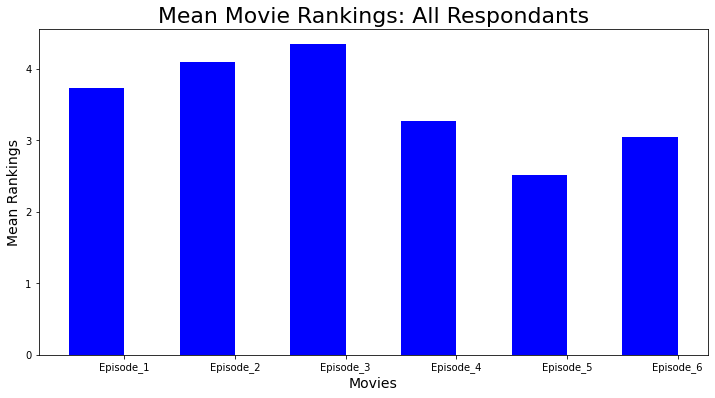

In [10]:
import matplotlib.pyplot as plt


#importing the matplotlib and seaborn libraries
%matplotlib inline
import seaborn as sns

    
N = 6

mean_bars = (mean_rankings)

ind = np.arange(N)
plt.figure(figsize=(12,6))

width = 0.5       

#Plotting the mean movie rankings for respondants
plt.bar(ind, mean_bars, width, color='blue', label='Mean Rankings')

plt.xlabel('Movies', size=14)
plt.ylabel('Mean Rankings', size=14)
plt.title('Mean Movie Rankings: All Respondants', size=22)

plt.xticks(ind + (width/2), ('Episode_1','Episode_2','Episode_3','Episode_4','Episode_5','Episode_6'))

plt.show()



In [11]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()
seen_sum

watched_ep1    673
watched_ep2    571
watched_ep3    550
watched_ep4    607
watched_ep5    758
watched_ep6    738
dtype: int64

([<matplotlib.axis.XTick at 0x2018d802130>,
 [Text(0.25, 0, 'seen_ep1'),
  Text(1.25, 0, 'seen_ep2'),
  Text(2.25, 0, 'seen_ep3'),
  Text(3.25, 0, 'seen_ep4'),
  Text(4.25, 0, 'seen_ep5'),
  Text(5.25, 0, 'seen_ep6')])

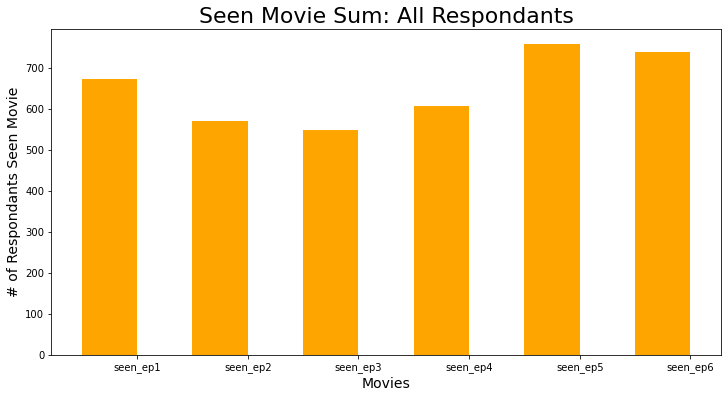

In [12]:
#Plotting all 'seen movie' data together
N = 6

# values of orange bars (height)
seen_bars = (seen_sum)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.5       

# Plotting
plt.bar(ind, seen_bars, width, color='orange', label='Seen Movie')

plt.xlabel('Movies', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum: All Respondants', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))


In [13]:
#Spliting the viewers by gender
male_viewers = star_wars[star_wars["Gender"] == "Male"][star_wars.columns[3:9]]
female_viewers = star_wars[star_wars["Gender"] == "Female"][star_wars.columns[3:9]]

#sum the total number of viewers per movie by gender
male_viewers_sum =male_viewers.sum()
female_viewers_sum =female_viewers.sum()

male_rankings = star_wars[star_wars["Gender"] == "Male"][star_wars.columns[9:15]]
female_rankings = star_wars[star_wars["Gender"] == "Female"][star_wars.columns[9:15]]


# Calculating the mean ranking for each movie by gender
males_rankings_mean = male_watchers.mean(skipna=True).reset_index()
females_rankings_mean = female_watchers.mean(skipna=True).reset_index()

print (males_rankings_mean)

NameError: name 'male_watchers' is not defined

In [ ]:
#How many males have seen each movie
checkbox_cols_m = [3,4,5,6,7,8]

for i in checkbox_cols_m:
    print (male_watchers.columns[i])
    print (male_watchers[male_watchers.columns[i]].value_counts(dropna=False))
    print('\n')

In [ ]:
#Plotting male and female seen movie data together
N = 6

# values of blue bars (height)
seen_male = (male_viewers_sum)
# values of orange bars (height)
seen_female = (female_viewers_sum)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, seen_male, width, color='blue', label='Males')
plt.bar(ind + width, seen_female, width, color='green', label='Females')

plt.xlabel('Seen Movie Sum', size=14)
plt.ylabel('# of Respondants Seen Movie', size=14)
plt.title('Seen Movie Sum by Gender', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

rank_ep1    4.037825
rank_ep2    4.224586
rank_ep3    4.274882
rank_ep4    2.997636
rank_ep5    2.458629
rank_ep6    3.002364
dtype: float64




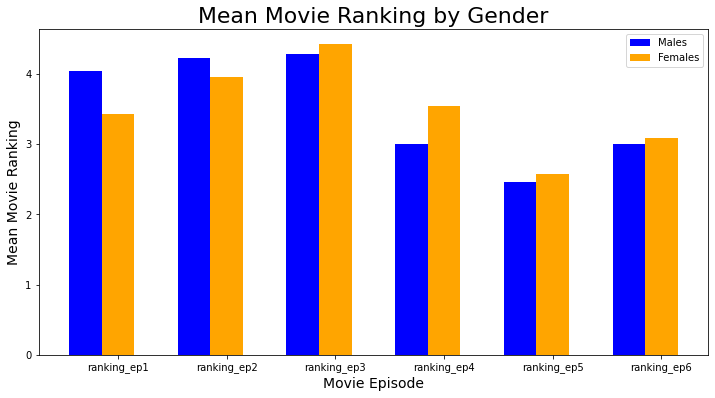

In [14]:
sw_males = star_wars[star_wars["Gender"] == "Male"]
sw_females = star_wars[star_wars["Gender"] == "Female"]



mean_rankings_m = sw_males[sw_males.columns[9:15]].mean(skipna=True)
print (mean_rankings_m)
print ('\n')
mean_rankings_f = sw_females[sw_females.columns[9:15]].mean(skipna=True)

#Plotting male and female movie ranking data together
N = 6

# values of blue bars (height)
male_mean = (mean_rankings_m)
# values of orange bars (height)
female_mean = (mean_rankings_f)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, male_mean, width, color='blue', label='Males')
plt.bar(ind + width, female_mean, width, color='orange', label='Females')

plt.xlabel('Movie Episode', size=14)
plt.ylabel('Mean Movie Ranking', size=14)
plt.title('Mean Movie Ranking by Gender', size=22)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width*2) / 2, ('ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4', 'ranking_ep5', 'ranking_ep6'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

# Observations

The movie rankings follow much the same order by gender. The largest discrepancy comes from episodes 1 and 4. Men where more likely to rank episode 4 more highly than women, wheras episode 1 was ranked higher by women. This means that for women, episode 1 is the only movie from the prequels to be ranked above a movie from the original trilogy (episode IV).